<a href="https://colab.research.google.com/github/AnshMaheshwari07/FoodDelivery_time_prediction/blob/main/delivery_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('train (1).csv')

In [5]:
print(df.shape)

(45593, 20)


In [80]:
df.head(20)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City,Time_taken(min),distance,day,month,year,day_of_week,is_weekend,Order_Prepare_Time(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,4,0,2,3,...,0,2,24,3,19,3,2022,5,1,15
1,34,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,3,...,0,0,33,20,25,3,2022,4,0,5
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,1,...,0,2,26,1,19,3,2022,5,1,15
3,38,4.7,11.003669,76.976494,11.053669,77.026494,4,3,0,0,...,0,0,21,7,5,4,2022,1,0,10
4,32,4.6,12.972793,80.249982,13.012793,80.289982,0,0,1,3,...,0,0,30,6,26,3,2022,5,1,15
5,22,4.8,17.431668,78.408321,17.461668,78.438321,0,1,0,0,...,0,2,26,4,11,3,2022,4,0,10
6,33,4.7,23.369746,85.339820,23.479746,85.449820,1,1,1,2,...,0,0,40,16,4,3,2022,4,0,15
7,35,4.6,12.352058,76.606650,12.482058,76.736650,0,3,2,2,...,0,0,32,20,14,3,2022,0,0,5
8,22,4.8,17.433809,78.386744,17.563809,78.516744,3,1,0,0,...,0,0,34,19,20,3,2022,6,1,10
9,36,4.2,30.327968,78.046106,30.397968,78.116106,1,1,2,3,...,0,0,46,10,12,2,2022,5,1,15


In [85]:
df['multiple_deliveries']

,multiple_deliveries
0,0
1,1
2,1
3,1
4,1
...,...
45588,0
45589,1
45590,0
45591,1


In [7]:
df=df.drop(columns=['ID','Delivery_person_ID'])

In [8]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [9]:
df.isnull().sum()

,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,0
Time_Order_picked,0
Weatherconditions,0


In [10]:
# Set the earth's radius (in kilometers)
R = 6371

# Convert degrees to radians
def deg_to_rad(degrees):
    return degrees * (np.pi/180)


In [11]:

# Function to calculate the distance between two points using the haversine formula
def distcalculate(lat1, lon1, lat2, lon2):
    d_lat = deg_to_rad(lat2-lat1)
    d_lon = deg_to_rad(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(deg_to_rad(lat1)) * np.cos(deg_to_rad(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

In [12]:
# Calculate the distance between each pair of points
df['distance'] = np.nan

for i in range(len(df)):
    df.loc[i, 'distance'] = distcalculate(df.loc[i, 'Restaurant_latitude'],
                                        df.loc[i, 'Restaurant_longitude'],
                                        df.loc[i, 'Delivery_location_latitude'],
                                        df.loc[i, 'Delivery_location_longitude'])

In [84]:
df['City'].value_counts()

,count
City,
0,35293
2,10136
1,164


In [ ]:
df.head(10)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,Festival,City,Time_taken(min),distance,day,month,year,day_of_week,is_weekend,Order_Prepare_Time(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,4,0,2,3,...,0,2,24,3,19,3,2022,5,1,15
1,34,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,3,...,0,0,33,20,25,3,2022,4,0,5
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,1,...,0,2,26,1,19,3,2022,5,1,15
3,38,4.7,11.003669,76.976494,11.053669,77.026494,4,3,0,0,...,0,0,21,7,5,4,2022,1,0,10
4,32,4.6,12.972793,80.249982,13.012793,80.289982,0,0,1,3,...,0,0,30,6,26,3,2022,5,1,15
5,22,4.8,17.431668,78.408321,17.461668,78.438321,0,1,0,0,...,0,2,26,4,11,3,2022,4,0,10
6,33,4.7,23.369746,85.339820,23.479746,85.449820,1,1,1,2,...,0,0,40,16,4,3,2022,4,0,15
7,35,4.6,12.352058,76.606650,12.482058,76.736650,0,3,2,2,...,0,0,32,20,14,3,2022,0,0,5
8,22,4.8,17.433809,78.386744,17.563809,78.516744,3,1,0,0,...,0,0,34,19,20,3,2022,6,1,10
9,36,4.2,30.327968,78.046106,30.397968,78.116106,1,1,2,3,...,0,0,46,10,12,2,2022,5,1,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  object 
 1   Delivery_person_Ratings      45593 non-null  object 
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Order_Date                   45593 non-null  object 
 7   Time_Orderd                  45593 non-null  object 
 8   Time_Order_picked            45593 non-null  object 
 9   Weatherconditions            45593 non-null  object 
 10  Road_traffic_density         45593 non-null  object 
 11  Vehicle_condition            45593 non-null  int64  
 12  Type_of_order                45593 non-null  object 
 13  Type_of_vehicle 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000
distance,45593.0,99.303911,1099.731281,1.465067,4.663493,9.264281,13.763977,19692.674606


In [13]:
df.describe(exclude=np.number).T

,count,unique,top,freq
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533
Type_of_vehicle,45593,4,motorcycle,26435
multiple_deliveries,45593,5,1,28159




1.   There is Nan value present in Time_ordered column.

2.   we need to convert columns like weatherconditions into numerical format




In [ ]:
for column in df.columns:

  print(column)
  print(df[column].value_counts())

  print("---------------")

ID
ID
0x4607     1
0x1f3e     1
0xe251     1
0x3f31     1
0x4a78     1
          ..
0xc3f1     1
0x5db7     1
0x1985     1
0xceda     1
0x5fb2     1
Name: count, Length: 45593, dtype: int64
---------------
Delivery_person_ID
Delivery_person_ID
PUNERES01DEL01     67
JAPRES11DEL02      67
HYDRES04DEL02      66
JAPRES03DEL01      66
VADRES11DEL02      66
                   ..
DEHRES18DEL03       7
AURGRES11DEL03      7
KOLRES09DEL03       6
KOCRES16DEL03       6
BHPRES010DEL03      5
Name: count, Length: 1320, dtype: int64
---------------
Delivery_person_Age
Delivery_person_Age
35      2262
36      2260
37      2227
30      2226
38      2219
24      2210
32      2202
22      2196
29      2191
33      2187
28      2179
25      2174
34      2166
26      2159
21      2153
27      2150
39      2144
20      2136
31      2120
23      2087
NaN     1854
50        53
15        38
Name: count, dtype: int64
---------------
Delivery_person_Ratings
Delivery_person_Ratings
4.8     7148
4.7     7142
4.9

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

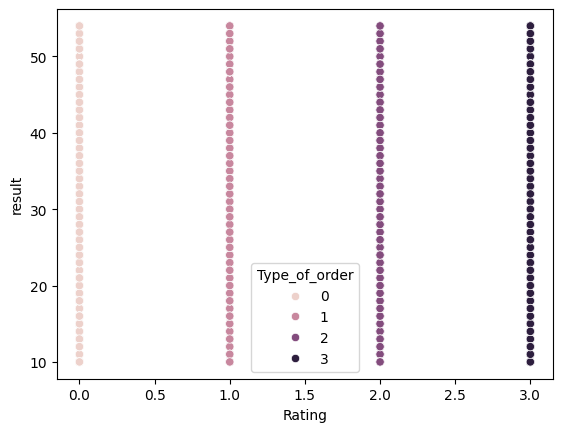

In [ ]:
sns.scatterplot(x=df['Type_of_order'],y=df['Time_taken(min)'],hue=df['Type_of_order'])
plt.xlabel('Rating')
plt.ylabel('result')
plt.show()

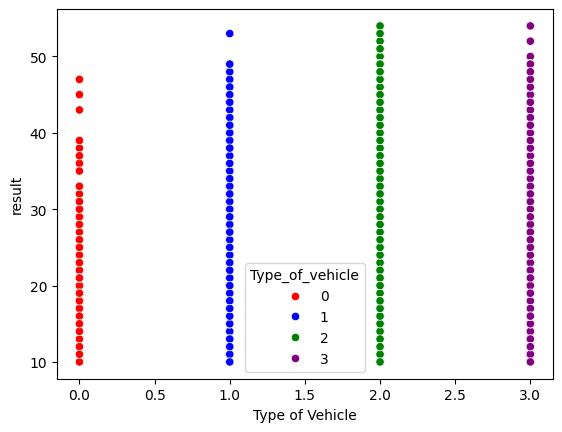

In [ ]:

custom_palette = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'purple'
}
#motorcycle           26435
#scooter              15276
#electric_scooter      3814
#bicycle                 68


sns.scatterplot(x=df['Type_of_vehicle'],y=df['Time_taken(min)'],hue=df['Type_of_vehicle'],palette=custom_palette)
plt.xlabel('Type of Vehicle')
plt.ylabel('result')


plt.show()



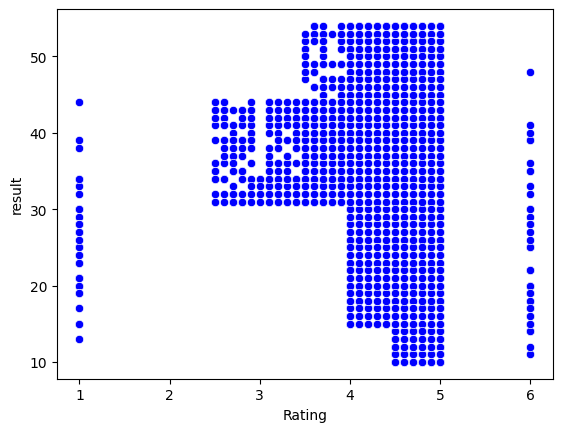

In [ ]:
sns.scatterplot(x=df['Delivery_person_Ratings'],y=df['Time_taken(min)'],color='blue')
plt.xlabel('Rating')
plt.ylabel('result')
plt.show()

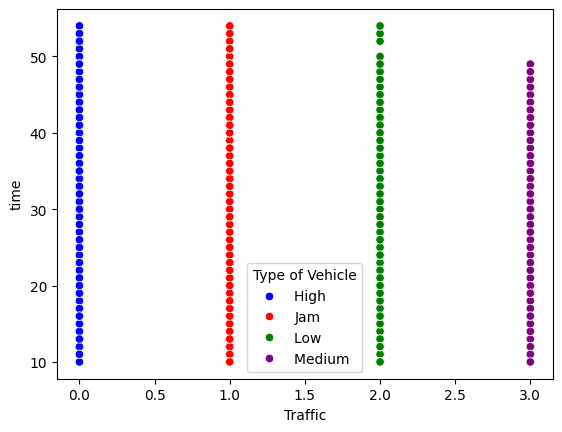

In [ ]:
custom_palette = {
    0: 'blue',
    1: 'red',
    2: 'green',
    3: 'purple'
}
#Low        15477
#Jam        14143
#Medium     10947
#High        4425

sns.scatterplot(x=df['Road_traffic_density'],y=df['Time_taken(min)'],hue=df['Road_traffic_density'],palette=custom_palette)
plt.xlabel('Traffic')
plt.ylabel('time')

handles, labels = plt.gca().get_legend_handles_labels()
# Create a mapping from encoded values to category names
category_mapping = {str(i): label for i, label in enumerate(labelenc.classes_)}
new_labels = [category_mapping[label] for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Type of Vehicle')

plt.show()

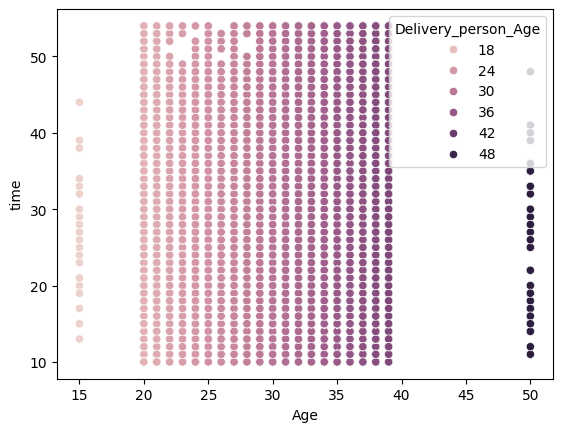

In [ ]:

sns.scatterplot(x=df['Delivery_person_Age'],y=df['Time_taken(min)'],hue=df['Delivery_person_Age'])
plt.xlabel('Age')
plt.ylabel('time')
plt.show()

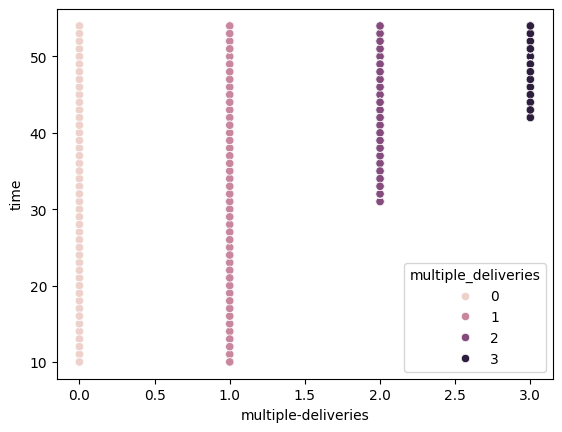

In [ ]:
sns.scatterplot(x=df['multiple_deliveries'],y=df['Time_taken(min)'],hue=df['multiple_deliveries'])
plt.xlabel('multiple-deliveries')
plt.ylabel('time')
plt.show()

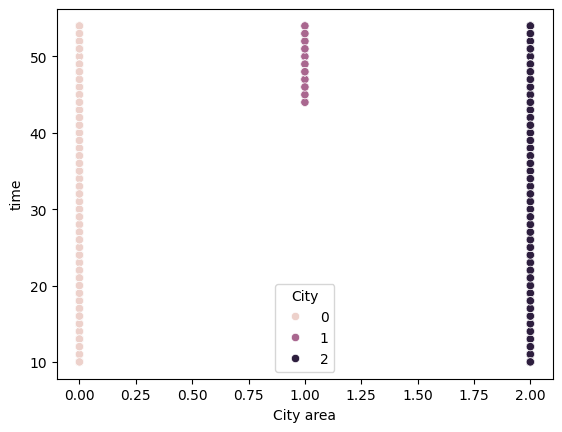

In [ ]:
#Metropolitian     34093 :0
#Semi-Urban          164:1
#Urban             10136:2



sns.scatterplot(x=df['City'],y=df['Time_taken(min)'],hue=df['City'])
plt.xlabel('City area')
plt.ylabel('time')
plt.show()

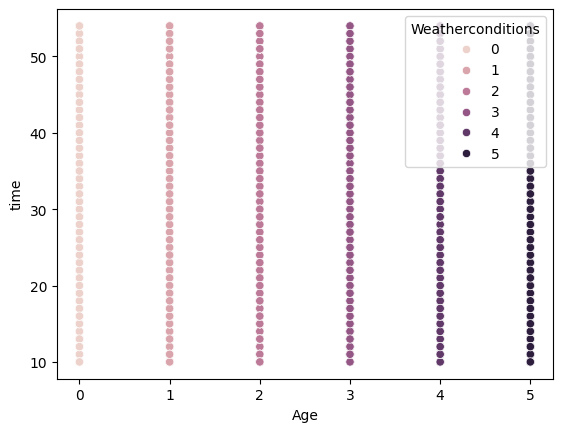

In [ ]:
sns.scatterplot(x=df['Weatherconditions'],y=df['Time_taken(min)'],hue=df['Weatherconditions'])
plt.xlabel('Age')
plt.ylabel('time')
plt.show()

In [ ]:
df['Time_taken(min)']

0        (min) 24
1        (min) 33
2        (min) 26
3        (min) 21
4        (min) 30
           ...   
45588    (min) 32
45589    (min) 36
45590    (min) 16
45591    (min) 26
45592    (min) 36
Name: Time_taken(min), Length: 45593, dtype: object

In [14]:
#extract what is necessary
def extract_column(dff):
    def extract_time_taken(x):
        try:
            parts = str(x).split(' ')
            if len(parts) > 1 and parts[0] == '(min)':
                return int(parts[1].strip())
            else:
                return None
        except Exception as e:
            print(f"Error processing {x}: {e}")
            return None
    def extract_weather_condition(x):
        parts = str(x).split(' ')
        return parts[1].strip() if len(parts) > 1 else None



    dff['Time_taken(min)'] = dff['Time_taken(min)'].apply(extract_time_taken)
    dff['Weatherconditions'] = dff['Weatherconditions'].apply(extract_weather_condition)


In [15]:
extract_column(df)

In [ ]:
print(df[['Time_taken(min)', 'Weatherconditions']].head())


   Time_taken(min) Weatherconditions
0               24             Sunny
1               33            Stormy
2               26        Sandstorms
3               21             Sunny
4               30            Cloudy


In [ ]:
df.shape

(45593, 19)

In [16]:
def removemissing(dff):
  dff.replace('NaN',float(np.nan),regex=True,inplace=True)

removemissing(df)


In [17]:

df.isnull().sum().sort_values(ascending=False)


,0
Delivery_person_Ratings,1908
Delivery_person_Age,1854
Time_Orderd,1731
City,1200
multiple_deliveries,993
Weatherconditions,616
Road_traffic_density,601
Festival,228
Order_Date,0
Delivery_location_longitude,0


In [ ]:
df['Order_Date']

0        19-03-2022
1        25-03-2022
2        19-03-2022
3        05-04-2022
4        26-03-2022
            ...    
45588    24-03-2022
45589    16-02-2022
45590    11-03-2022
45591    07-03-2022
45592    02-03-2022
Name: Order_Date, Length: 45593, dtype: object

In [41]:
def handle_null_values(df):
    df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']), inplace=True)
    df['Weatherconditions'].fillna(np.random.choice(df['Weatherconditions']), inplace=True)
    df['City'].fillna(df['City'].mode()[0], inplace=True)
    df['Festival'].fillna(df['Festival'].mode()[0], inplace=True)
    df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
    df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0], inplace=True)
    df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].mode()[0], inplace=True)

handle_null_values(df)

<ipython-input-41-9ddafd64d2e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Delivery_person_Age'].fillna(np.random.choice(df['Delivery_person_Age']), inplace=True)
<ipython-input-41-9ddafd64d2e2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

In [42]:
df.isnull().sum()

,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Weatherconditions,0
Road_traffic_density,0
Vehicle_condition,0
Type_of_order,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  object 
 1   Delivery_person_Ratings      45593 non-null  object 
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Order_Date                   45593 non-null  object 
 7   Time_Orderd                  43862 non-null  object 
 8   Time_Order_picked            45593 non-null  object 
 9   Weatherconditions            45593 non-null  object 
 10  Road_traffic_density         45593 non-null  object 
 11  Vehicle_condition            45593 non-null  int64  
 12  Type_of_order                45593 non-null  object 
 13  Type_of_vehicle 

In [19]:
def update_datatype(dff):
  dff['Delivery_person_Ratings']=dff['Delivery_person_Ratings'].astype('float64')
  dff['Delivery_person_Age']=dff['Delivery_person_Age'].astype('int64')
  dff['distance']=dff['distance'].astype('int64')
  dff['multiple_deliveries']=dff['multiple_deliveries'].astype('int64')

update_datatype(df)

In [ ]:
df.shape

(45593, 19)

In [ ]:
df[['Delivery_person_Age','Delivery_person_Ratings']].head()

,Delivery_person_Age,Delivery_person_Ratings
0,37,4.9
1,34,4.5
2,23,4.4
3,38,4.7
4,32,4.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  int64  
 1   Delivery_person_Ratings      45593 non-null  float64
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Order_Date                   45593 non-null  object 
 7   Time_Orderd                  43862 non-null  object 
 8   Time_Order_picked            45593 non-null  object 
 9   Weatherconditions            45593 non-null  object 
 10  Road_traffic_density         45593 non-null  object 
 11  Vehicle_condition            45593 non-null  int64  
 12  Type_of_order                45593 non-null  object 
 13  Type_of_vehicle 

In [ ]:
df['Festival']

0        No 
1        No 
2        No 
3        No 
4        No 
        ... 
45588    No 
45589    No 
45590    No 
45591    No 
45592    No 
Name: Festival, Length: 45593, dtype: object

In [20]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder


In [21]:
labelenc=LabelEncoder()
def categ_transform(dff):
  dff['Type_of_order']=labelenc.fit_transform(dff['Type_of_order'])
  dff['Type_of_vehicle']=labelenc.fit_transform(dff['Type_of_vehicle'])
  dff['Weatherconditions']=labelenc.fit_transform(dff['Weatherconditions'])
  dff['Festival']=labelenc.fit_transform(dff['Festival'])
  dff['City']=labelenc.fit_transform(dff['City'])

categ_transform(df)

In [ ]:
dfff=df.copy()

In [ ]:
dfff['Weatherconditions'].fillna(dfff['Weatherconditions'].mode()[0],inplace=True)

In [22]:
df['Weatherconditions'].value_counts()

,count
Weatherconditions,
0,8152
1,7654
3,7586
2,7495
5,7422
4,7284


In [43]:
df.isnull().sum()

,0
Delivery_person_Age,0
Delivery_person_Ratings,0
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Weatherconditions,0
Road_traffic_density,0
Vehicle_condition,0
Type_of_order,0


In [24]:
df['Order_Date']=pd.to_datetime(df['Order_Date'],format='%d-%m-%Y')

In [25]:
def Order_date_conversion(dff):
  dff['day']=dff['Order_Date'].dt.day
  dff['month']=dff['Order_Date'].dt.month
  dff['year']=dff['Order_Date'].dt.year
  dff['day_of_week']=dff['Order_Date'].dt.day_of_week.astype(int)
  dff['is_weekend']=np.where(dff['day_of_week'].isin([5,6]),1,0)


Order_date_conversion(df)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,...,multiple_deliveries,Festival,City,Time_taken(min),distance,day,month,year,day_of_week,is_weekend
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,4,...,0,0,2,24,3,19,3,2022,5,1
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,3,...,1,0,0,33,20,25,3,2022,4,0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,2,...,1,0,2,26,1,19,3,2022,5,1
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,4,...,1,0,0,21,7,5,4,2022,1,0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,0,...,1,0,0,30,6,26,3,2022,5,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Delivery_person_Age          45593 non-null  int64         
 1   Delivery_person_Ratings      43685 non-null  float64       
 2   Restaurant_latitude          45593 non-null  float64       
 3   Restaurant_longitude         45593 non-null  float64       
 4   Delivery_location_latitude   45593 non-null  float64       
 5   Delivery_location_longitude  45593 non-null  float64       
 6   Order_Date                   45593 non-null  datetime64[ns]
 7   Time_Orderd                  43862 non-null  object        
 8   Time_Order_picked            45593 non-null  object        
 9   Weatherconditions            45593 non-null  int64         
 10  Road_traffic_density         45593 non-null  object        
 11  Vehicle_condition            45593 non-nu

In [27]:
df.isnull().sum()

,0
Delivery_person_Age,0
Delivery_person_Ratings,1908
Restaurant_latitude,0
Restaurant_longitude,0
Delivery_location_latitude,0
Delivery_location_longitude,0
Order_Date,0
Time_Orderd,1731
Time_Order_picked,0
Weatherconditions,0


In [28]:
def calculate_time(dff):
  dff['Time_Orderd']=pd.to_timedelta(dff['Time_Orderd'])
  dff['Time_Order_picked']=pd.to_timedelta(dff['Time_Order_picked'])
  dff['Order_Date'] = pd.to_datetime(dff['Order_Date'])

  dff['Time_Ordered_formatted'] = dff['Order_Date'] + dff['Time_Orderd']
  dff['Time_Order_picked_formatted'] = dff['Order_Date'] + dff['Time_Order_picked']

    # Adjust for cases where the pickup time is past midnight
  dff['Time_Order_picked_formatted'] = np.where(
        dff['Time_Order_picked'] < dff['Time_Orderd'],
        dff['Time_Order_picked_formatted'] + pd.DateOffset(days=1),
        dff['Time_Order_picked_formatted']
    )


  dff['Order_Prepare_Time(min)']=(dff['Time_Order_picked_formatted']-dff['Time_Ordered_formatted']).dt.total_seconds()/60

  dff['Order_Prepare_Time(min)'].fillna(dff['Order_Prepare_Time(min)'].median(),inplace=True)

  dff.drop(['Time_Orderd', 'Time_Order_picked', 'Time_Ordered_formatted', 'Time_Order_picked_formatted', 'Order_Date'], axis=1, inplace=True)

calculate_time(df)

<ipython-input-28-f7b533b65319>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dff['Order_Prepare_Time(min)'].fillna(dff['Order_Prepare_Time(min)'].median(),inplace=True)


In [29]:
df.shape

(45593, 22)

In [30]:
df['Road_traffic_density']=labelenc.fit_transform(df['Road_traffic_density'])

In [31]:
df['Order_Prepare_Time(min)']=df['Order_Prepare_Time(min)'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          45593 non-null  int64  
 1   Delivery_person_Ratings      45593 non-null  float64
 2   Restaurant_latitude          45593 non-null  float64
 3   Restaurant_longitude         45593 non-null  float64
 4   Delivery_location_latitude   45593 non-null  float64
 5   Delivery_location_longitude  45593 non-null  float64
 6   Weatherconditions            45593 non-null  int64  
 7   Road_traffic_density         45593 non-null  int64  
 8   Vehicle_condition            45593 non-null  int64  
 9   Type_of_order                45593 non-null  int64  
 10  Type_of_vehicle              45593 non-null  int64  
 11  multiple_deliveries          45593 non-null  int64  
 12  Festival                     45593 non-null  int64  
 13  City            

In [ ]:
df.shape

(45593, 22)

In [32]:
df['Time_taken(min)']=df['Time_taken(min)'].astype('int64')

In [33]:
df['City'].value_counts()

,count
City,
0,35293
2,10136
1,164


In [35]:
X=df.drop(['Vehicle_condition','Type_of_order','day','month','year','day_of_week','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Festival','year','Time_taken(min)'],axis=1)
y=df['Time_taken(min)']

In [36]:
print(X)

       Delivery_person_Age  Delivery_person_Ratings  Weatherconditions  \
0                       37                      4.9                  4   
1                       34                      4.5                  3   
2                       23                      4.4                  2   
3                       38                      4.7                  4   
4                       32                      4.6                  0   
...                    ...                      ...                ...   
45588                   30                      4.8                  5   
45589                   21                      4.6                  5   
45590                   30                      4.9                  0   
45591                   20                      4.7                  0   
45592                   23                      4.9                  1   

       Road_traffic_density  Type_of_vehicle  multiple_deliveries  City  \
0                         0         

In [73]:
X.head(5)

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Type_of_vehicle,multiple_deliveries,City,distance,is_weekend,Order_Prepare_Time(min)
0,37,4.9,4,0,2,0,2,3,1,15
1,34,4.5,3,1,3,1,0,20,0,5
2,23,4.4,2,2,2,1,2,1,1,15
3,38,4.7,4,3,2,1,0,7,0,10
4,32,4.6,0,0,3,1,0,6,1,15


In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [38]:
X_train.shape

(36474, 10)

In [50]:
y_train

,Time_taken(min)
12193,15
26718,23
22567,23
40034,29
44813,29
...,...
11532,45
27640,16
14501,24
30727,14


In [44]:
std=StandardScaler()
X_train_df=std.fit_transform(X_train)
X_test_df=std.transform(X_test)

In [45]:
df['Time_taken(min)'].isnull().sum()

0

In [46]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [51]:
!pip install --upgrade scikit-learn xgboost

In [ ]:
# Find the best model
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRegressor(),
]

param_grid = [
    {},
    {'max_depth': [3, 5, 7]},
    {'n_estimators': [100, 200, 300]},
    {'n_estimators': [20, 25, 30], 'max_depth': [5, 7, 9]},
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model, param_grid[i], cv=5, scoring='r2')
    grid_search.fit(X_train_df, y_train)

    print(f"{model.__class__.__name__}:")
    print("Best parameters:", grid_search.best_params_)
    print("Best R2 score:", grid_search.best_score_)
    print()

LinearRegression:
Best parameters: {}
Best R2 score: 0.345466455560124

DecisionTreeRegressor:
Best parameters: {'max_depth': 7}
Best R2 score: 0.7028785188576804

RandomForestRegressor:
Best parameters: {'n_estimators': 300}
Best R2 score: 0.7354525113849191

XGBRegressor:
Best parameters: {'max_depth': 7, 'n_estimators': 20}
Best R2 score: 0.7660339423747622



In [52]:
xgbr=xgb.XGBRegressor(max_depth=5,n_estimators=25)

In [54]:
svr=SVR()
gbr=GradientBoostingRegressor()
knn=KNeighborsRegressor()
rfc=RandomForestRegressor()

In [ ]:
X_train_df.shape

(36474, 9)

In [55]:
rfc.fit(X_train_df,y_train)

RandomForestRegressor()

In [64]:
y_train_pred = rfc.predict(X_train_df)
y_test_pred = rfc.predict(X_test_df)


In [65]:
print("r2 score training ",r2_score(y_train,y_train_pred))
print("r2 score testing ",r2_score(y_test,y_test_pred))

r2 score training  0.9565642157348753
r2 score testing  0.736637898366397


In [66]:
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))


Mean Absolute Error (MAE): 3.7
Mean Squared Error (MSE): 22.86
Root Mean Squared Error (RMSE): 4.78
R-squared (R2) Score: 0.74


In [69]:

specific_data_point = X_test_df[20].reshape(1, -1)  # Reshape if necessary
specific_prediction = rfc.predict(specific_data_point)

print(f"Prediction for the first data point: {specific_prediction[0]}")


Prediction for the first data point: 16.27


In [70]:
y_test.iloc[20]

19

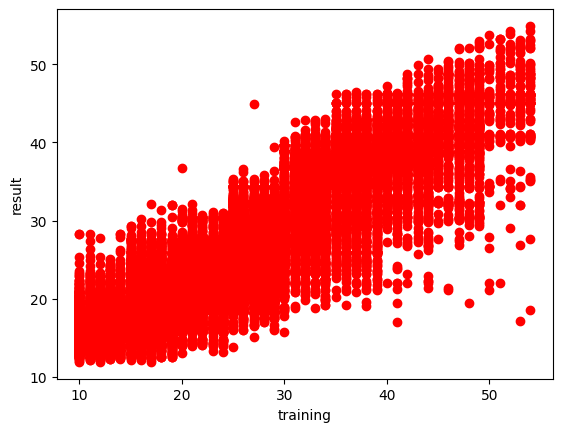

In [63]:
plt.scatter(y_train,y_train_pred,color='red')
plt.xlabel('training')
plt.ylabel('result')
plt.show()

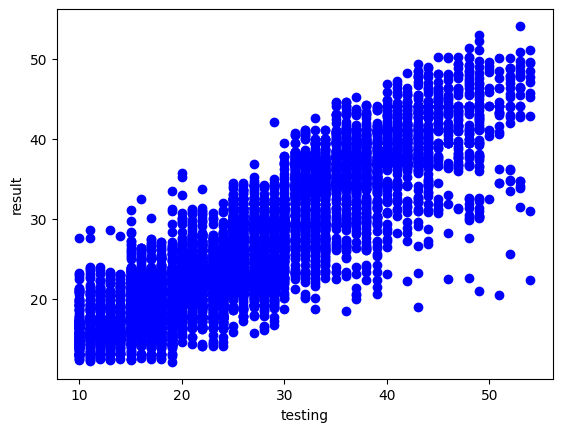

In [ ]:
plt.scatter(y_test,y_test_pred,color='blue')
plt.xlabel('testing')
plt.ylabel('result')
plt.show()

In [ ]:
matrix=pd.DataFrame(X,y).corr()
print(matrix)

                         Delivery_person_Age  Delivery_person_Ratings  \
Delivery_person_Age                 1.000000                -0.123788   
Delivery_person_Ratings            -0.123788                 1.000000   
Weatherconditions                  -0.271666                -0.079550   
Road_traffic_density                0.116568                 0.286431   
Type_of_vehicle                     0.224821                -0.137022   
multiple_deliveries                 0.140555                -0.081970   
City                               -0.198954                 0.118836   
distance                            0.056783                -0.333432   
is_weekend                         -0.018664                -0.057235   
Order_Prepare_Time(min)             0.048924                 0.080523   

                         Weatherconditions  Road_traffic_density  \
Delivery_person_Age              -0.271666              0.116568   
Delivery_person_Ratings          -0.079550              0.28

<Figure size 800x600 with 0 Axes>

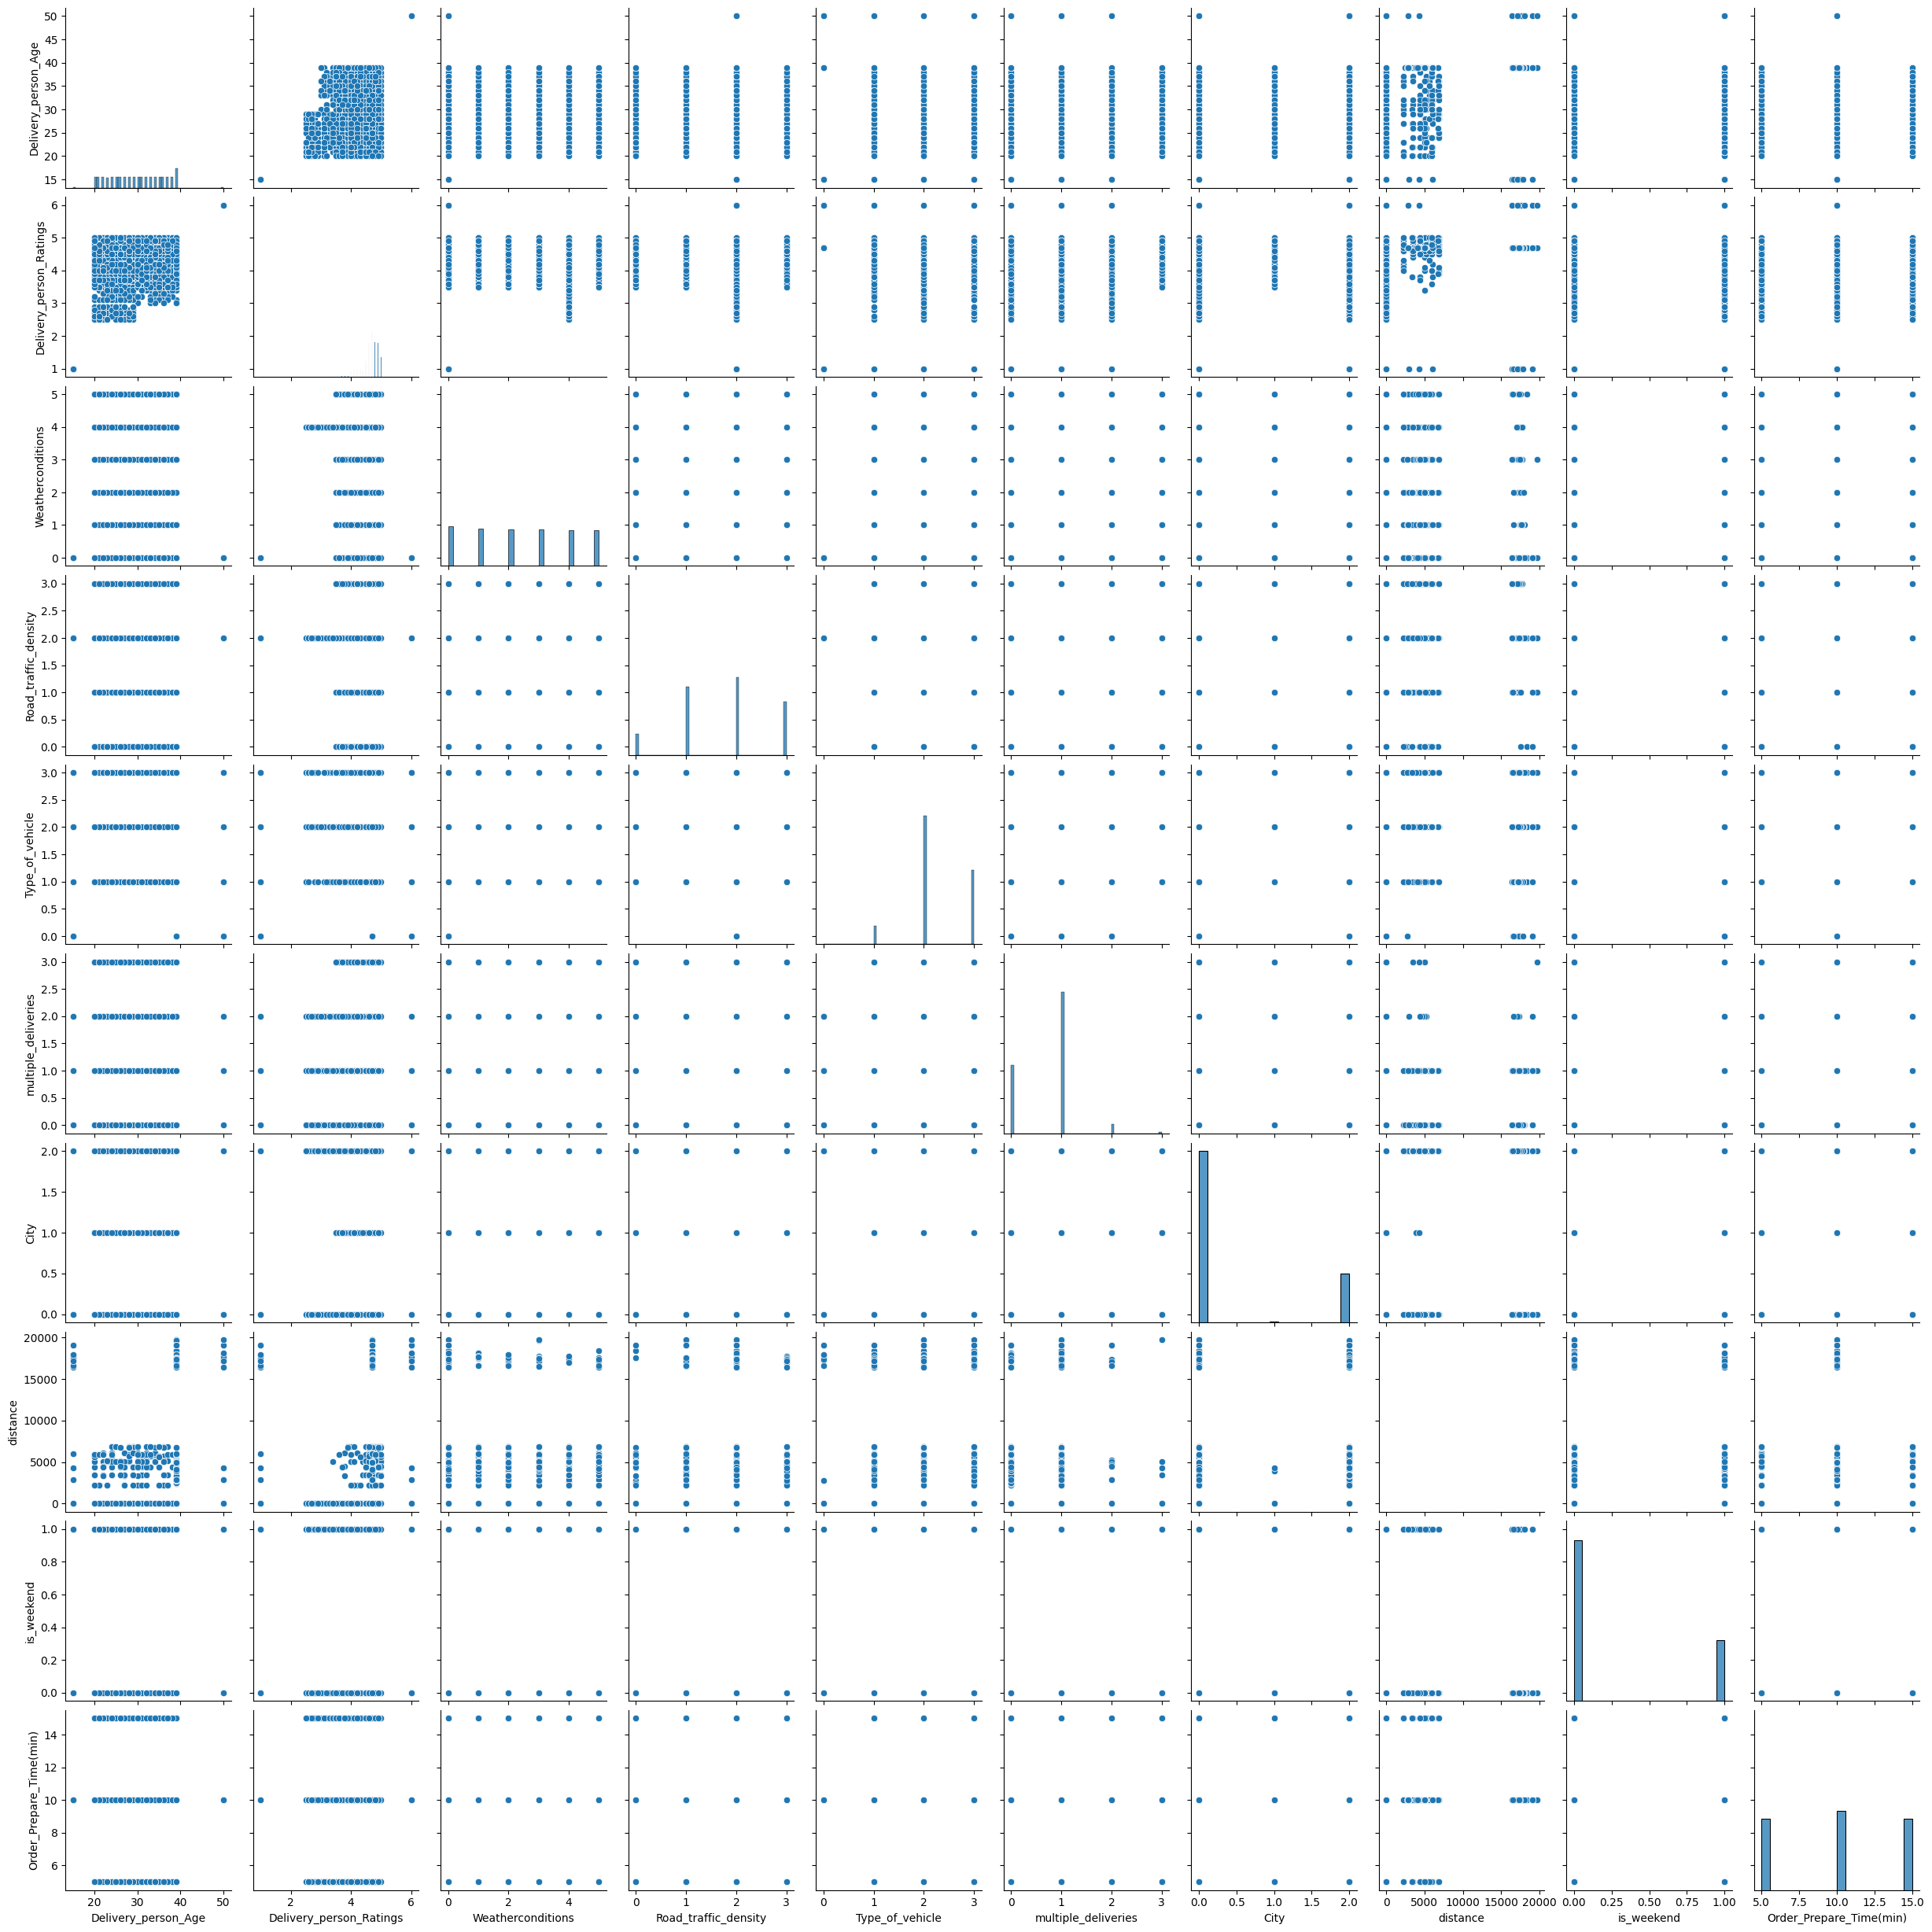

<Figure size 800x600 with 0 Axes>

In [ ]:

sns.pairplot(X)
plt.figure(figsize=(8,6))

In [71]:
import joblib

# Save the model
joblib.dump(rfc, "delivery_distance_model.pkl")


['delivery_distance_model.pkl']

In [72]:
from google.colab import files
files.download("delivery_distance_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>